<a id='top'></a>


> **Welcome to the Investigate a Dataset project! The data set have been used here is No-showappointments (original source on Kaggle). Link of the database are located [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000). This project is submitted to FWD-Data professional track. The project has coded by Mohamed Afifi - Ph.D.; [Scopus ID](https://www.scopus.com/authid/detail.uri?origin=AuthorProfile&authorId=7005535392&zone=) [email: phafifi@gmail.com](phafifi@gmail.com).**

# Project #2: Investigate a Dataset - [No-showappointments]

## Table of Contents
<ul>
<li><a href="#1">1. Introduction</a></li>
<li><a href="#1.1">1.1 Dataset Description</a></li>
<li><a href="#1.2">1.2 Questions to be answered upon user response</a></li>
<li><a href="#1.3">1.3 Questions for Analysis</a></li>
<li><a href="#1.4">1.4 Data Wrangling</a></li>
<li><a href="#2">2. Code structure</a></li>
<li><a href="#2.1">2.1 Importing lib. and other data</a></li>
<li><a href="#2.2">2.2 Data read and wrangling</a></li>
<li><a href="#2.3">2.3 Show all data in numbers</a></li>
<li><a href="#2.4">2.4 Show all data in graphs</a></li>
<li><a href="#2.5">2.5 Filter the output</a></li>
<li><a href="#2.6">2.6 Show filtered data in numbers</a></li>
<li><a href="#2.7">2.7 Show filtered data in graphs</a></li>
<li><a href="#2.8">2.8 Main function</a></li>
<li><a href="#3">3. Conclusions</a></li>
<li><a href="#3.1">3.1 Results</a></li>
<li><a href="#3.2">3.2 Limitations</a></li>    
</ul>

<a id='1'></a>
## 1. Introduction


<a id='1.1'></a>
### 1.1 Dataset Description 
The dataset discription were collected from [the FWD-Udacity website](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf). This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show upfor their appointment. A number ofcharacteristics about the patient areincluded in each row.
      
- ‘ScheduledDay’ tells us onwhat day the patient set up theirappointment.
- ‘Neighborhood’ indicates thelocation of the hospital.
- ‘Scholarship’ indicateswhether or not the patient isenrolled in Brasilian welfareprogram Bolsa Família.
- Be careful about the encodingof the last column: it says ‘No’ ifthe patient showed up to theirappointment, and ‘Yes’ if theydid not show up.


<a id='1.2'></a>
### 1.2 Questions to be answered upon user response
- First: What are the major criteria of the not shown appointment data are concerted of?
- Second: How the user would like to filter the data for better data analysis?
- Third What percent are each column unique values are represented related to all population?
For example: The age was categorized to five different age category (Child, Teenage, Young, Adult, Senior). The user is asked what criteria to filter the data based on it, to show other data for the only chosen criteria.


<a id='1.3'></a>
### 1.3 Questions for Analysis
In the code we asked multiple questions in order to prepare the data frame by sorting, elemination or modification.
 - The first question were presented in the main function and it asking the user if he/she like to present the data either by number format or graphs.
 - The other questions are asking about the sorting, elemination or modification criteria for easy and simple data peresintations.
 - The last question is asking the users whether they need to start over or exit the data program.
 
 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

<a id='1.4'></a>
### 1.4 Data Wrangling

I have used some codes to check the data and the csv file contains unique data. All columns are informative and will be used in for analysis. Here are some code lines used to wrangling the data. Another data wrangling were found in initial_data() cell.

df = pd.read_csv('xxx.csv')
df.head()
to_drop = ['column 1', 'column 4', 'column 13'] # list of columns to use in drop fn.
df.drop(to_drop, inplace=True, axis=1)
df['column xxx'].is_unique # check if unique to be used as index
df = df.set_index('column xxx')
df.get_dtype_counts()

 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

<a id='2'></a>

# 2. Code structure
The code concests of 8 jupyter cells and they are defined as below: 



<a id='2.1'></a>
## 2.1 Importing lib. and other data 
I started with importing the python liberaries (pandas, numpy, time and matplotlib). I also added three dictinaries and two lists to be called inside the program funcions. days_con dictinary is used to convert the days in number form to days in letters form inside the dataframe and in data visulization for the end user screen. Same for months_con dictinary. fltr_chice dictinary is used for data visulization at the end user screen and helps in writing a short and compact code. On the other hand, the lists data and fltr are used to give the code the length of single values inside a loop code.



 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [183]:
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  
#only with jupyter to plot inline


days_con = {
    5: "Sat",
    6: "Sun",
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri"
}


months_con = {
    1:  "Jan",
    2:  "Feb",
    3:  "Mar",
    4:  "Apr",
    5:  "May",
    6:  "Jun",
    7:  "Jul",
    8:  "Aug",
    9:  "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

fltr_choice = {
'Gender          ': 1,
'No-Show         ': 2,
'Age categories  ': 3,
'SMS remainder   ': 4,
'Day             ': 5,
'Month           ': 6,
'Scholarship     ': 7,
'Hipertension    ': 8,
'Diabetes        ': 9,
'Alcoholism      ': 10,
'Handicap        ': 11,
}


data = [
    ['Gender', 2, 'M', 'F'],
    ['No-show', 2, 'No', 'Yes'],
    ['Age categories', 5, 'Child','Teenage','Young','Adult','Senior'],
    ['SMS_received', 2, 0, 1],
    ['The day', 3, 0, 1, 2, 3, 4, 5],
    ['month', 4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ['Neighbourhood', 5, 0, 1, 2, 3, 4],
    ['Scholarship', 2, 0, 1],
    ['Hipertension', 2, 0, 1],
    ['Diabetes', 2, 0, 1],
    ['Alcoholism', 2, 0, 1],
    ['Handcap', 5, 0, 1, 2, 3, 4],
]

fltr = [
    ['Gender', 2, 'M', 'F'],
    ['No-show', 2, 'No', 'Yes'],
    ['Age categories', 5, 'Child','Teenage','Young','Adult','Senior'],
    ['SMS_received', 2, 0, 1],
    ['The day', 7, "Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
    ['month', 12, "Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    ['Scholarship', 2, 0, 1],
    ['Hipertension', 2, 0, 1],
    ['Diabetes', 2, 0, 1],
    ['Alcoholism', 2, 0, 1],
    ['Handcap', 5, 0, 1, 2, 3, 4],
] 


<a id='2.2'></a>
## 2.2 Data read and wrangling
I choosed the No Show Appointment data to analysis. In this cell I red the data and extract the month and day from the schedualed day column. I changed both month and day data to be written in letters with the assist of previously defined lists. Also I added a new column with age categorie as 'Child' from 0 to 8 years, 'Teenage' till 17 years, 'Young' till 30 years, 'Adult' till 60 years and 'Senior' over 60 years.


 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [184]:
def initial_data():
    df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])      # convert the Start Time column to datetime
    df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])  # convert the Start Time column to datetime
    df['month'] = df['ScheduledDay'].dt.month
    df = df.replace({'month':months_con})
    df['The day'] = df['ScheduledDay'].dt.weekday #The day of the week with Monday=0, Sunday=6
    df = df.replace({'The day':days_con})
    df['nofdays'] = df['ScheduledDay'] - df['AppointmentDay']
    df['Age categories']= pd.cut(df['Age'], bins=[0,8,17,30,60,1000], labels = ['Child','Teenage','Young','Adult','Senior'])
    return df

In [185]:
def CorrMatrixPlt():
    df1=initial_data()
    df1.drop(['PatientId', 'AppointmentID'],inplace=True,axis=1)
    CorrMatrix = df1.corr()
    x=[i for i in CorrMatrix.columns]
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    cax=ax.matshow(CorrMatrix, vmin=-1,vmax=1)
    fig.colorbar(cax)
    ticks=np.arange(0,7,1)
    ax.set_xticks(ticks)
    ax.set_xticklabels(x, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(x)
    plt.title('Correlation Matrix', fontsize=24)
    plt.show()

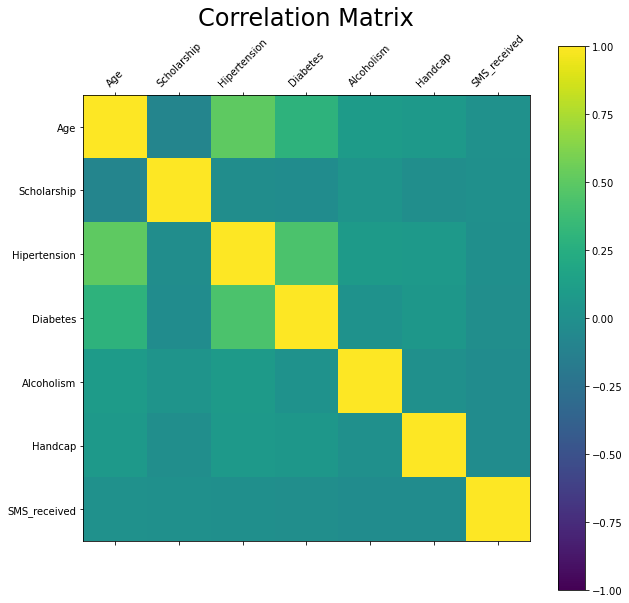

In [186]:
def Radar_graph():
    df3 = initial_data()
    labels = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']

    F0=[]
    F1=[]
    M0=[]
    M1=[]

    df_F=df3.loc[df3['Gender']=='F'] # only females
    df_M=df3.loc[df3['Gender']=='M'] # only males

    for i in lables:    
        F0.append(round((df_F[i].value_counts()[0]/df3.shape[0]*100),0)) # fill the list with percentage values of female & 0 or not applied values
        F1.append(round((df_F[i].value_counts()[1]/df3.shape[0]*100),0)) # fill the list with percentage values of female & 1 or applied values
        M0.append(round((df_M[i].value_counts()[0]/df3.shape[0]*100),0)) # fill the list with percentage values of male & 0 or not applied values
        M1.append(round((df_M[i].value_counts()[1]/df3.shape[0]*100),0)) # fill the list with percentage values of male & 1 or applied values




    num_vars = len(labels)                                                # Number of independant variables
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() # Split the circle into even parts and save the angles

    F0 += F0[:1]
    F1 += F1[:1]
    M0 += M0[:1]
    M1 += M1[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


    ax.plot(angles, F0, color='red', linewidth=2, label= 'Female Negative')  # Draw the outline of our data
    ax.fill(angles, F0, color='red', alpha=0.25)                             # Fill the outlines

    ax.plot(angles, F1, color='blue', linewidth=1, label= 'Female Positive')
    ax.fill(angles, F1, color='blue', alpha=0.35)

    ax.plot(angles, M0, color='yellow', linewidth=2, label= 'Male Negative')
    ax.fill(angles, M0, color='yellow', alpha=0.25)

    ax.plot(angles, M1, color='green', linewidth=1, label= 'Male Positive')
    ax.fill(angles, M1, color='green', alpha=0.35)

    ax.set_theta_offset(np.pi / 2)        # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_direction(-1)

    angles.pop()                                    # pop the last value which is repetation of the first value
    ax.set_thetagrids(np.degrees(angles), labels);  # Draw axis lines for each angle and label.

    ax.set_title('Radar Graph To Show Most Depending Variables >> Unit = percent to the total number of patiants', y=1.1); # title
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1)); # apply the legend
    plt.show()

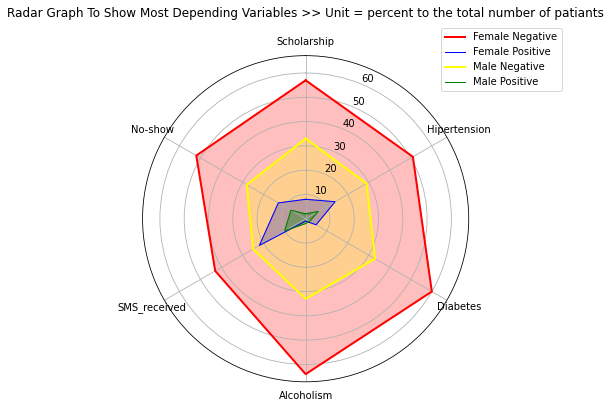

<a id='2.3'></a>
## 2.3 Show all data in numbers
I asked the user to choose which data type he/she is interested to show (as shown below). Based on the answer the main function calls this function to show all data in numbers (top 5 values if larger than 5). The code used two for loops to show all columns unique values counts.

#### ----- How it looks at user terminal -----
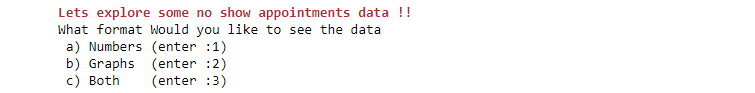
\
#### ----- Results sample at user terminal -----
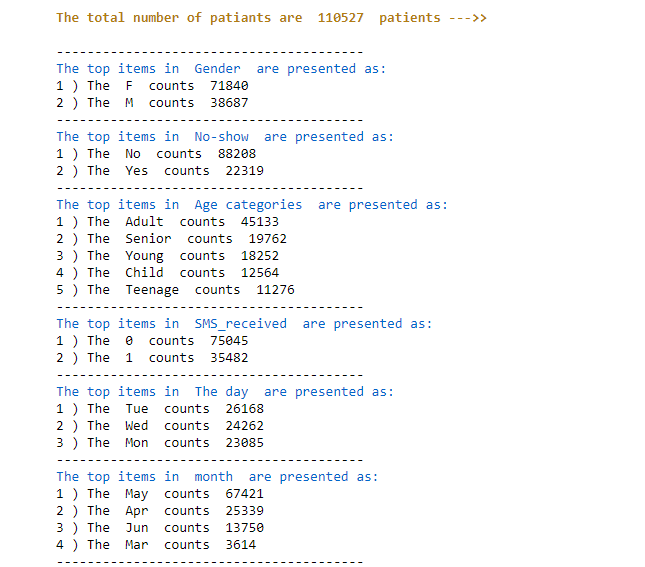
#### ----- It shows all data like this -----

\

#### Summary:
The answer shows all patiant and shows a summarized look to the data. What each factor values (like Gender, SMS recived, etc...) or top values if the factor contains lot of unique values.


 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [187]:
def glopal_data(df):
    print('\n\033[93m'+'\033[1m'+'The total number of patiants are ', len(df), ' patients --->>'+'\033[0m\n')
    for i in range(len(data)):
        print('-'*40)
        print('\033[94m'+'The top items in ', data[i][0], ' are presented as: '+'\033[0m')
        for j in range (data[i][1]):
            print(j+1,') The ',df[data[i][0]].value_counts().index[j],' counts ',df[data[i][0]].value_counts().iloc[j])    

<a id='2.4'></a>
## 2.4 Show all data in graphs
Same as the above cell. This cell is used to show all data unique values in a histogram with the assist of matplotlib liberary.


#### ----- How it looks at user terminal -----
Lets explore some no show appointments data !!\
What format Would you like to see the data \
a) Numbers (enter :1)\
b) Graphs  (enter :2)\
c) Both    (enter :3)\
\
\
#### ----- Sample of the output results shown at user terminal -----
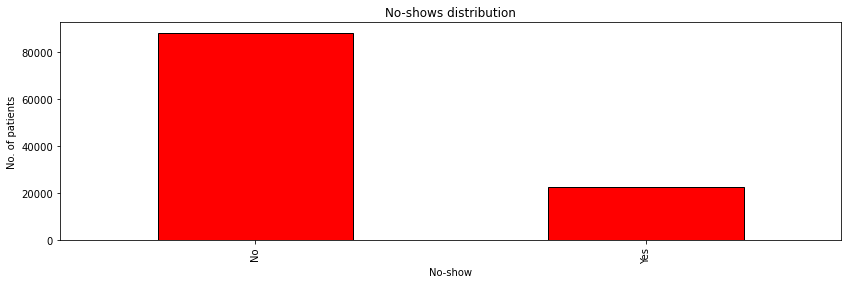
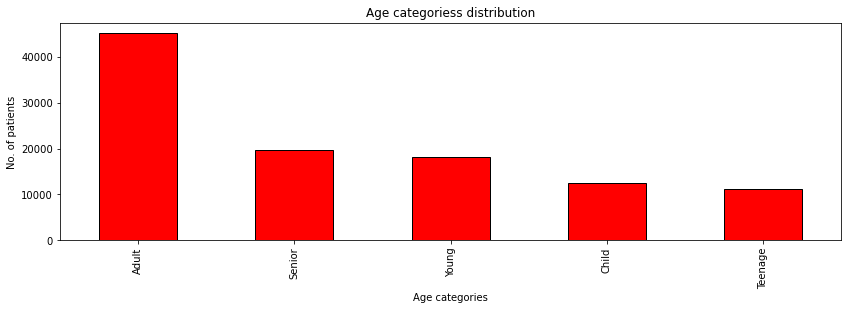
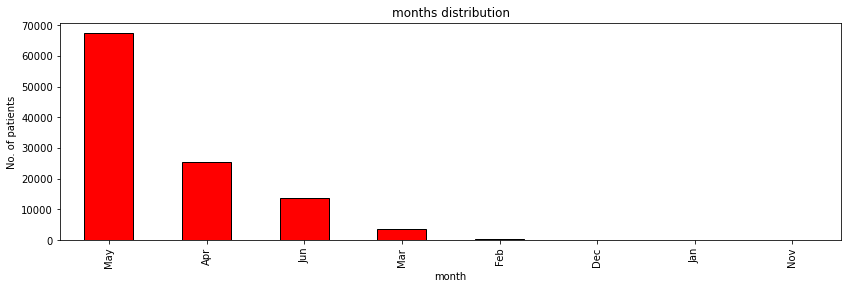
#### ----- It shows all data like this -----


#### Summary:
The answer shows graphs for summarized look to the data. What each factor values are represented in the data and give the user an initial look to whole data. These graphs are helping the user to decide What factors to use in the next questions.


 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [188]:
def glopal_graphs(df):
    print('\n\033[93m'+'\033[1m'+'The total number of patiants are ', len(df), ' patients --->>'+'\033[0m\n')
    for i in range(len(data)):
        x=df[data[i][0]].value_counts()
        x.plot(kind="bar",figsize=(14,4), color='red', edgecolor='black')
        plt.xlabel(x.name)
        plt.ylabel("No. of patients")
        plt.title("%ss distribution" % x.name)
        plt.show()
        print('-'*60)

<a id='2.5'></a>
## 2.5 Filter the output
In filter function cell, I asked the user multiple quetions and filling three variables a, b, and c. these variables are used to decide which analysis and data to show based on two level filteration. i.e. the user can show the data for only one day in the week or one month in the year. 
\
\
\
\
#### ----- How it looks at user terminal -----


*Note: Kindly follow the guidance while entering your choice!!
\
\
Would you like to filter the data: Enter,  0 for no or 1 for yes\
#### ----- If the user enters 1: the below values will show to choose from:
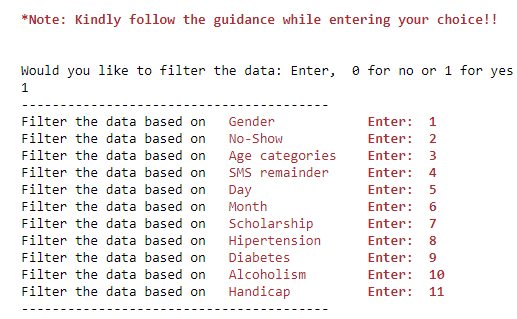
#### ----- Then the user is asked to choose which data he is interested to show as below:
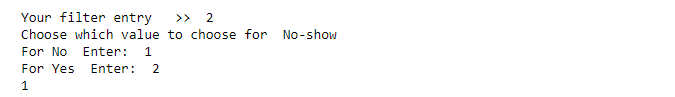

#### Summary:
This part of script will give the user the option to filter the results based on one variable to show other depending data in the same format he/she decided first.
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [189]:
def filter_constants():
    a=b=c=0
    '''
    a, b, and c are variable used to filter the data
    a is a variable shows the used decision on data filteration
    b is a variable to save level one filteration criteria
    c is a variable to save level two filteration criteria
    ***
    for example: if a = 1 means the user decided to filter the data and b and c will need to be entered for further filteration criteria
    b to choose which column to filter the dataframe based on it
    c to choose which unique value to show the data based on it
    '''
    print('\n\033[91m'+'\033[1m'+'*Note: Kindly follow the guidance while entering your choice!!'+'\033[0m\n')
    a = int(input('\n\033[92m'+'\033[1m'+'Would you like to filter the data: Enter,  0 for no or 1 for yes '+'\033[0m\n'))
    if a == 1:
        print('-'*40)
        for i in range(len(fltr_choice)):
            print ('Filter the data based on ','\033[91m',list(fltr_choice.keys())[i],'\033[1m','Enter: ',fltr_choice[list(fltr_choice.keys())[i]],'\033[0m')
        print('-'*40)
        b = int(input('Your filter entry   >>  '))
#        b = int(input('Filter the data based on Gender          : Enter 1 \nFilter the data based on No-Show         : Enter 2 \nFilter the data based on Age categories  : Enter 3 \nFilter the data based on SMS remainder   : Enter 4 \nFilter the data based on day             : Enter 5 \nFilter the data based on month           : Enter 6 \nFilter the data based on scholarship     : Enter 7 \nFilter the data based on Hipertension    : Enter 8 \nFilter the data based on Diabetes        : Enter 9 \nFilter the data based on Alcoholism      : Enter 10 \nFilter the data based on Handicap        : Enter 11 \n'))
        if b < 1 or b > 11:
            return a,0,0
        else:
            print('Choose which value to choose for ',fltr[b-1][0])
            for i in range((len(fltr[b-1]))-2):
                print('For',fltr[b-1][i+2], ' Enter: ',i+1)
            c = int(input())
            if c <= ((len(fltr[b-1]))-2) and c >= 1:
                return a,b,c
            return a,b,0
    else:
        return 0,0,0

<a id='2.6'></a>
## 2.6 Show filtered data in numbers
This cell is to show the filtered data only in numbers format.



#### ---- The output data will show as in the attached image ----
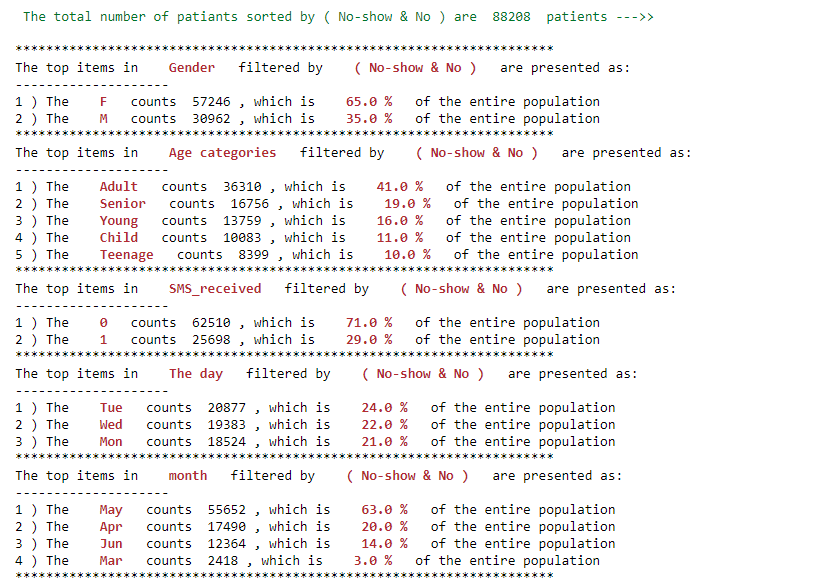

 
#### Summary:
This and following parts of script will show the results based on the chosen variable filter in data and graphs.
 

<ul>
<a href="#top">Go to TOP</a>
</ul>

In [190]:
def show_data(a,b,c,df):
    if a==0 or b==0 or c==0:
        print('\n\033[91m'+'\033[1m'+'You Did not choosed to filter!'+'\033[0m\n')
        return 0
    else:
        df = df[df[fltr[b-1][0]] == (fltr[b-1][c+1])] 
        
        print('\n\033[92m','The total number of patiants sorted by (',fltr[b-1][0],"&",(fltr[b-1][c+1]),') are ', len(df), ' patients --->>','\033[0m\n')
        for i in range(len(data)):
            if data[i][0] != fltr[b-1][0]: 
                print('*'*70)
                print('The top items in ','\033[91m','\033[1m', data[i][0],'\033[0m', ' filtered by ','\033[91m','\033[1m','(',fltr[b-1][0],"&",(fltr[b-1][c+1]),')','\033[0m',' are presented as: ')
                print('-'*20)
                for j in range (data[i][1]-0):
                    if j<len(df[data[i][0]].value_counts()):
                        print(j+1,') The ','\033[91m','\033[1m',df[data[i][0]].value_counts().index[j],'\033[0m',' counts ',df[data[i][0]].value_counts().iloc[j], ', which is ','\033[91m','\033[1m',(((df[data[i][0]].value_counts().iloc[j])/(len(df)))*100).round(0),'%','\033[0m',' of the entire population')
                        
       

    
                

<a id='2.7'></a>
## 2.7 Show filtered data in graphs
Same as the above cell. This cell is used to show the filtered data in a histogram with the assist of matplotlib liberary.

 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

In [191]:
def show_graphs(a,b,c,df):
    if a==0 or b==0 or c==0:
        print('You Did not choosed to filter!')
        return 0
    else:
        df = df[df[fltr[b-1][0]] == (fltr[b-1][c+1])] 
        print('The total number of patiants sorted by (',fltr[b-1][0],"&",(fltr[b-1][c+1]),') are ', len(df), ' patients --->>')
        for i in range(len(data)):
            if data[i][0] != fltr[b-1][0]:
                x=df[data[i][0]].value_counts()
                x.plot(kind="bar",figsize=(14,4), color='blue', edgecolor='black')
                plt.xlabel(x.name)
                plt.ylabel("No. of patients")
                plt.title("%ss distribution" % x.name)
                plt.show()
                print('-'*60)

<a id='2.8'></a>
## 2.8 Main function 
The main funcion is calling all other cells and give the user some instructions to help him to show the data he desire.

 
 
<ul>
<a href="#top">Go to TOP</a>
</ul>

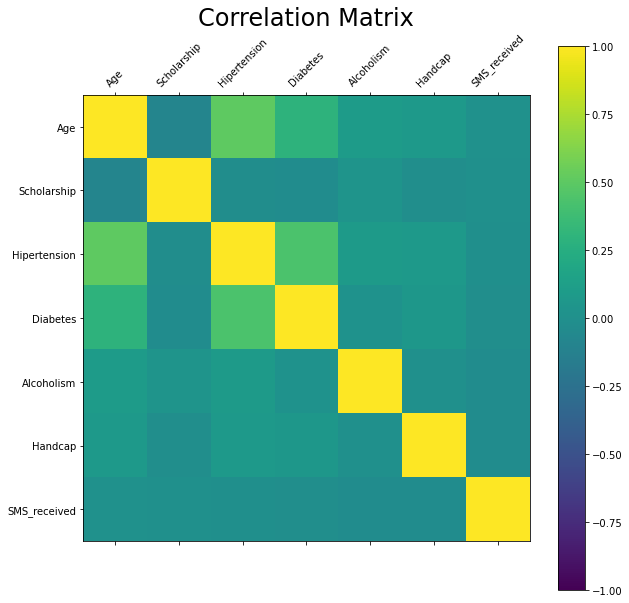

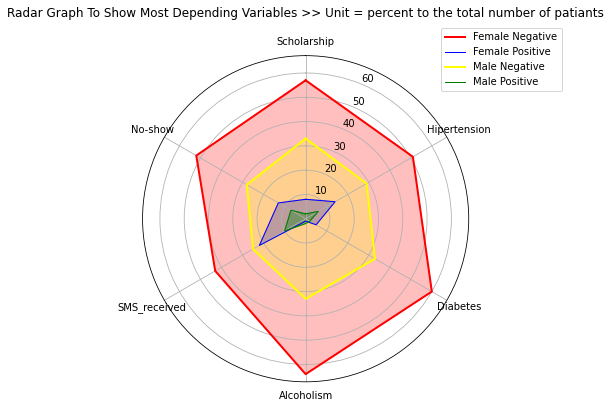

Lets explore some no show appointments data !!
What format Would you like to see the data 
 a) Numbers (enter :1)
 b) Graphs  (enter :2)
 c) Both    (enter :3)
3

The total number of patiants are  110527  patients --->>

----------------------------------------
The top items in  Gender  are presented as: 
1 ) The  F  counts  71840
2 ) The  M  counts  38687
----------------------------------------
The top items in  No-show  are presented as: 
1 ) The  No  counts  88208
2 ) The  Yes  counts  22319
----------------------------------------
The top items in  Age categories  are presented as: 
1 ) The  Adult  counts  45133
2 ) The  Senior  counts  19762
3 ) The  Young  counts  18252
4 ) The  Child  counts  12564
5 ) The  Teenage  counts  11276
----------------------------------------
The top items in  SMS_received  are presented as: 
1 ) The  0  counts  75045
2 ) The  1  counts  35482
----------------------------------------
The top items in  The day  are presented as: 
1 ) The  Tue  counts 

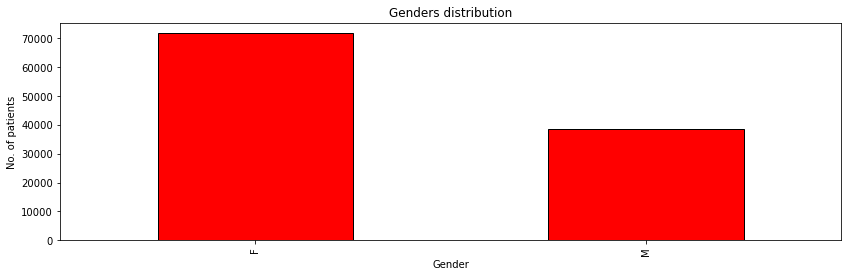

------------------------------------------------------------


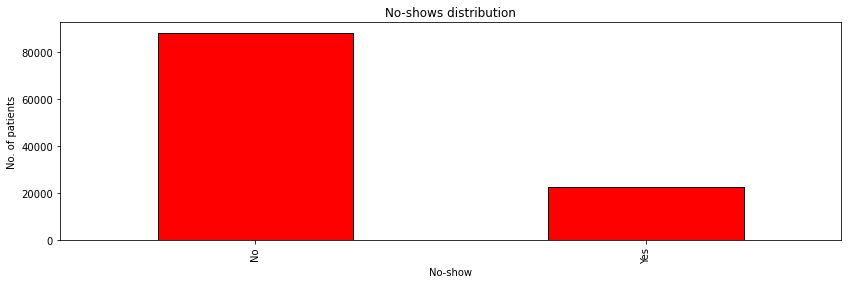

------------------------------------------------------------


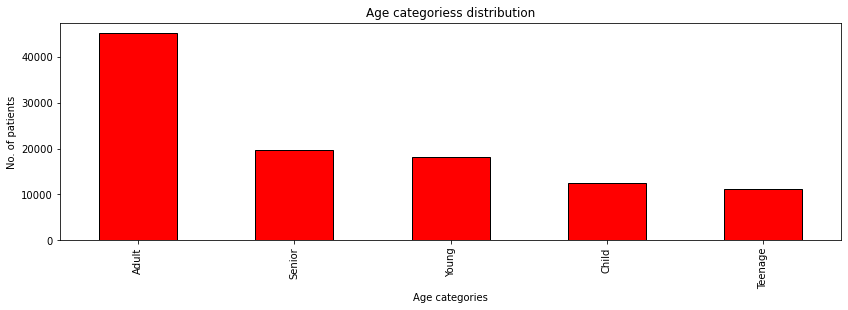

------------------------------------------------------------


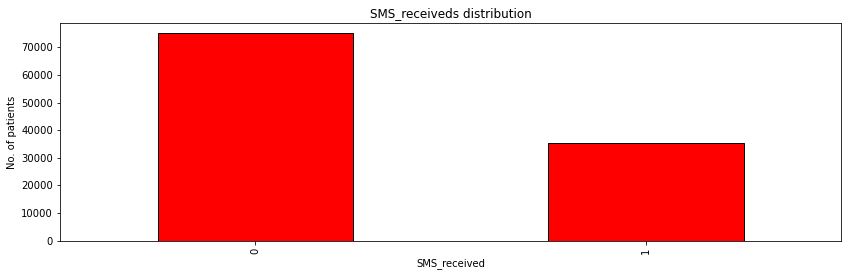

------------------------------------------------------------


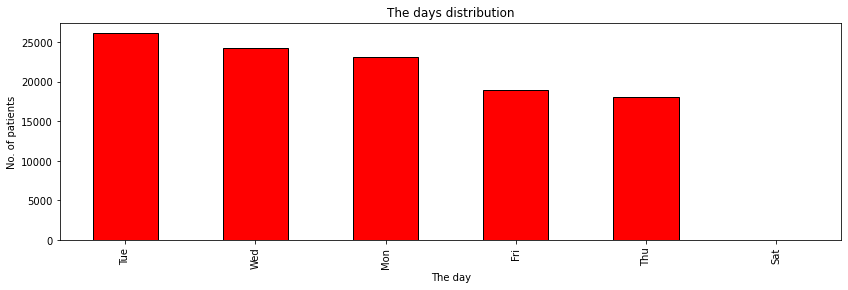

------------------------------------------------------------


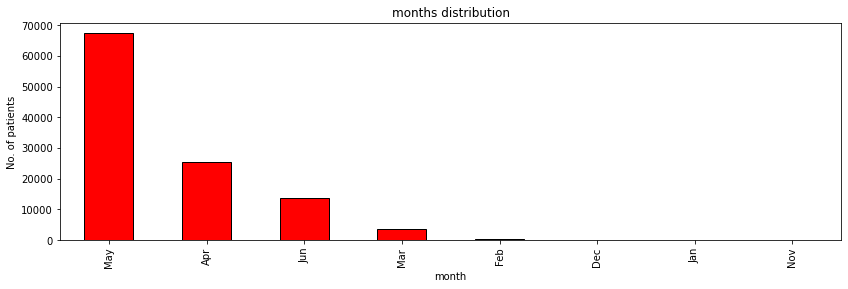

------------------------------------------------------------


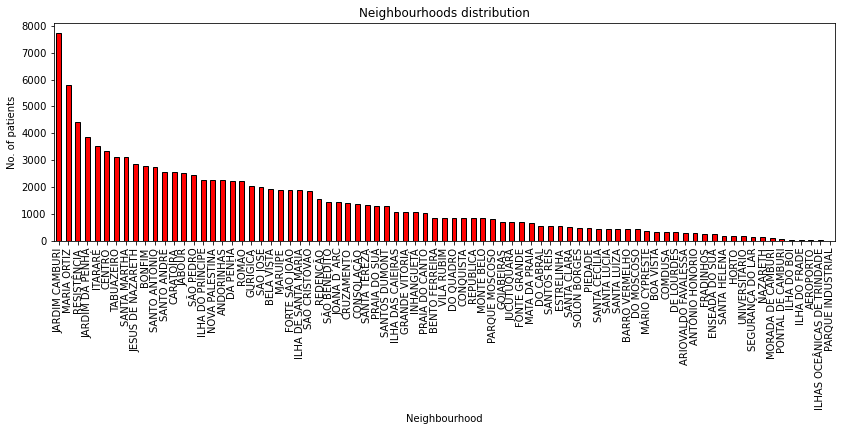

------------------------------------------------------------


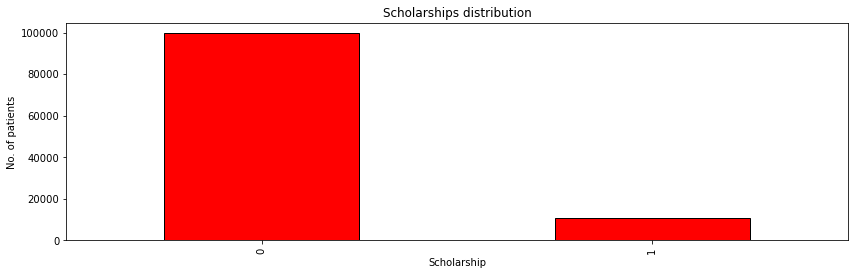

------------------------------------------------------------


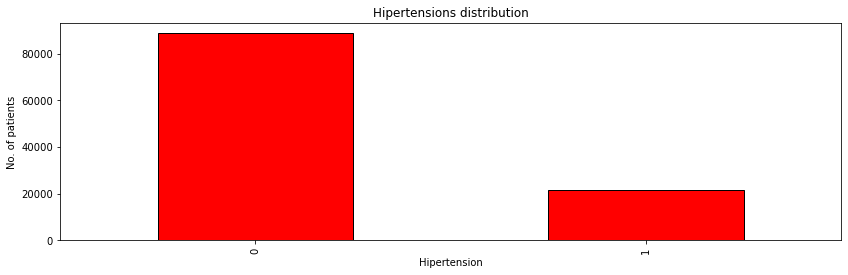

------------------------------------------------------------


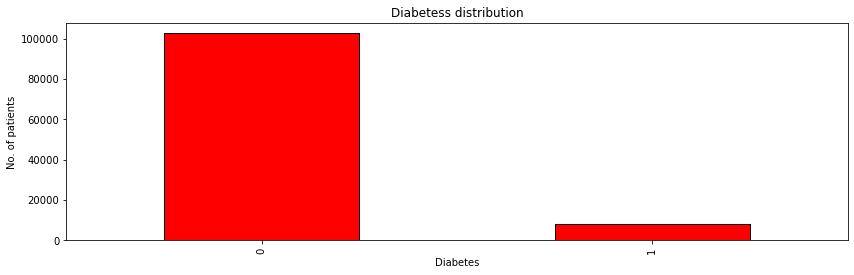

------------------------------------------------------------


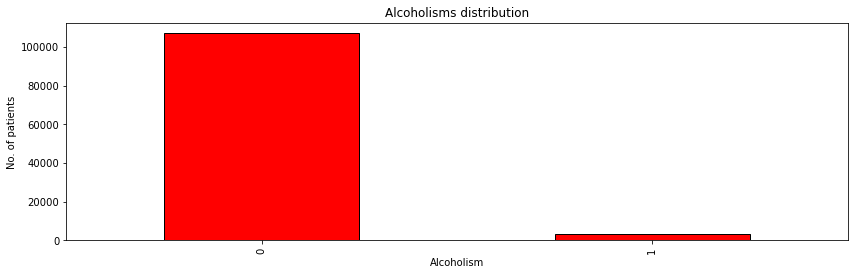

------------------------------------------------------------


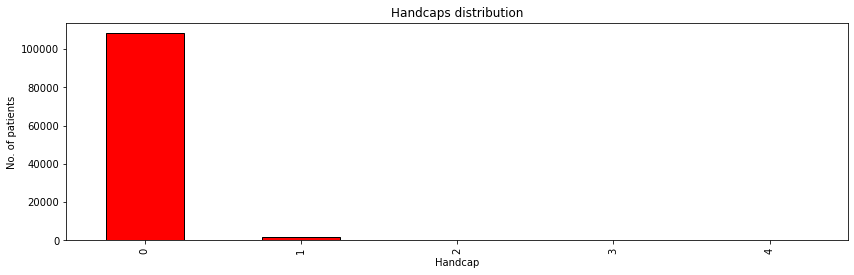

------------------------------------------------------------

*Note: Kindly follow the guidance while entering your choice!!


Would you like to filter the data: Enter,  0 for no or 1 for yes 
0

You Did not choosed to filter!

You Did not choosed to filter!

Would you like to restart? Enter yes or no.
0
Thank you!


In [192]:
def main():
    CorrMatrixPlt()
    Radar_graph()
    while True:
        df = initial_data()          
        print('\033[91m'+'\033[1m'+'Lets explore some no show appointments data !!'+'\033[0m')
        d = int(input('What format Would you like to see the data \n a) Numbers (enter :1)\n b) Graphs  (enter :2)\n c) Both    (enter :3)\n'))

        if d == 1 or d == 3:
            glopal_data(df)
        if d == 2 or d == 3:
            glopal_graphs(df)

        a,b,c = filter_constants()

        if d == 1 or d == 3:
            show_data(a,b,c,df)
        if d == 2 or d == 3:
            show_graphs(a,b,c,df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            print("Thank you!")
            break



if __name__ == "__main__":
	main()

<a id='3'></a>
## 3. Conclusions

<a id='3.1'></a>
### 3.1 Results
The results for not show patients are 22319 patients. 
- 1) The Females counts 14594, which is 65.0 %   while the males count 7725, which is 35.0 % of the entire population.

- 2) The    Adult   counts  8823 , which is    40.0 %, the    Young   counts  4493 , which is    20.0 %, The    Senior   counts  3006 , which is    13.0 %, the    Teenage   counts  2877 , which is    13.0 %  and the    Child   counts  2481 , which is    11.0 %   of the entire population.

- 3) The not received SMS counts  12535 , which is    56.0 % while the received SMS counts  9784 , which is    44.0 %   of the entire population.

- 4) The not show are the most at Tuesday and counts  5291 , which is    24.0 % followed by The    Wednesday   counts  4879 , which is    22.0 %then the    Monday   counts  4561 , which is    20.0 % of all not shown patients.

- 5) The month affected the not show as the    May   counts  11769 , which is    53.0 %, the    Apr   counts  7849 , which is    35.0 %, the    Jun   counts  1386 , which is    6.0 %, and the    Mar   counts  1196 , which is    5.0 %.

- 6) The top 5 Neighborhoods for the not shown patients are JARDIM CAMBURI  with 1465 patient, which is    7.0 %, MARIA ORTIZ   with 1219 patients, which is 5.0 %, ITARARÉ   with  923 patients, which is    4.0 %, RESISTÊNCIA with 906 patients, which is 4.0 %, and CENTRO  with  703 , which is    3.0 %   of the entire population.

- 7) The patients with no Scholarship  counts  19741 (88.0 %) to 2578 (12.0 %) patients with scholarship.

- 8) The patients without Hypertension are 18547 (83.0 %) to 3772 (17.0 %) patients with Hypertension status. The patients without Diabetes are 20889 (94.0 %) to 1430 (6.0 %) patients with Diabetes status. The patients without Alcoholism are 21642 (97.0 %) to 677 (3.0 %) patients with Alcoholism status.

- 9) The Hand caped patients are 407 (2.0 %) compared with 21912 (98.0 %) not hand caped patients.


<a id='3.2'></a>
### 3.2 Limitations
The available data still limited to full decide what factor affects the not-show at the medical appointments. There is some other factor would be useful for such data analyses such as: 
- a) How far is the health care center away from the patiant home. 
- b) Follow up to the patiant records for not-shows. 
- c) Does the patiant have Alzheimer disease or with series medical problems. 
- d) Employment status of the patiants.


<ul>
<a href="#top">Go to TOP</a>
</ul>